In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

import sys
from pathlib import Path

project_root = Path.cwd().parent.parent
sys.path.append(str(project_root))
from ingest.ohlcv import get_connection
from ingest.utils import get_ibex_tickers

with get_connection() as conn:
    df = pd.read_sql("SELECT * FROM ohlcv", conn)
    

Ticker ACS.MC
Ticker ACX.MC
Ticker AENA.MC
Ticker AMS.MC
Ticker ANA.MC
Ticker ANE.MC
Ticker BBVA.MC
Ticker BKT.MC
Ticker CABK.MC
Ticker CLNX.MC
Ticker COL.MC
Ticker ELE.MC
Ticker ENG.MC
Ticker FDR.MC
Ticker FER.MC


c:\Users\alexd\Documents\TFG_inversion_bolsa\venv\Lib\site-packages\statsmodels\graphics\utils.py:55: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure()


Ticker GRF.MC
Ticker IAG.MC
Ticker IBE.MC
Ticker ITX.MC
Ticker LOG.MC
Ticker MAP.MC
Ticker MRL.MC
Ticker MTS.MC
Ticker NTGY.MC
Ticker PUIG.MC
Ticker RED.MC
Ticker SAB.MC
Ticker SAN.MC
Ticker TEF.MC
Ticker UNI.MC


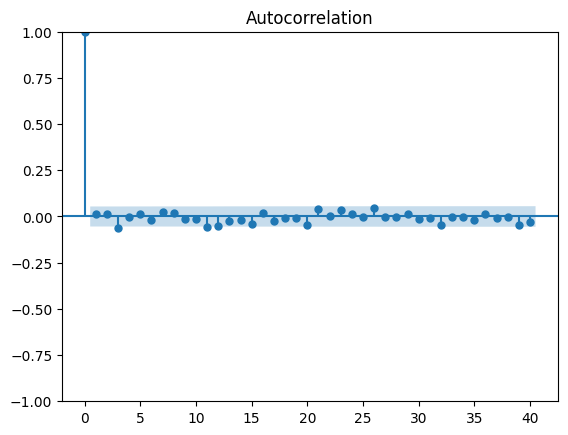

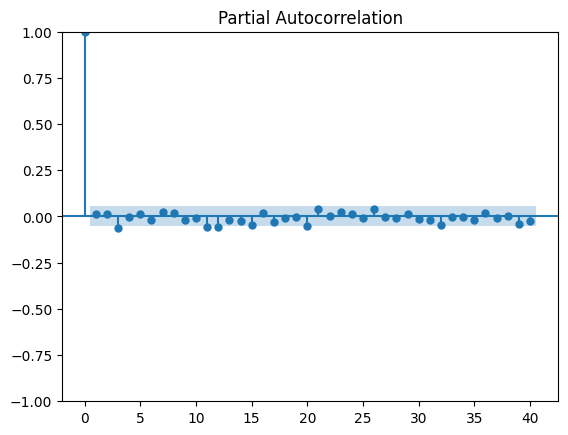

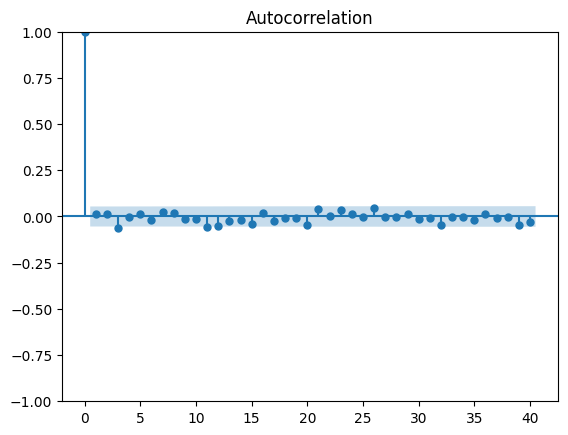

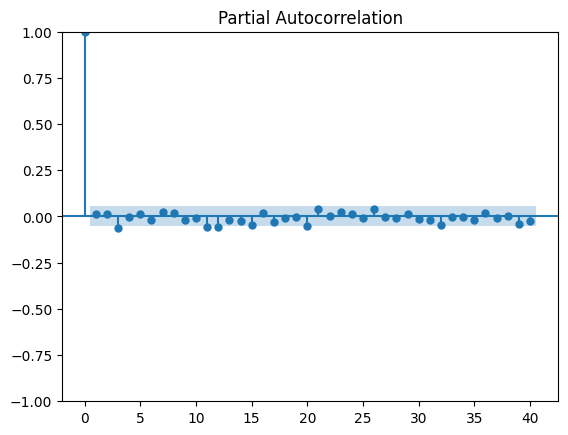

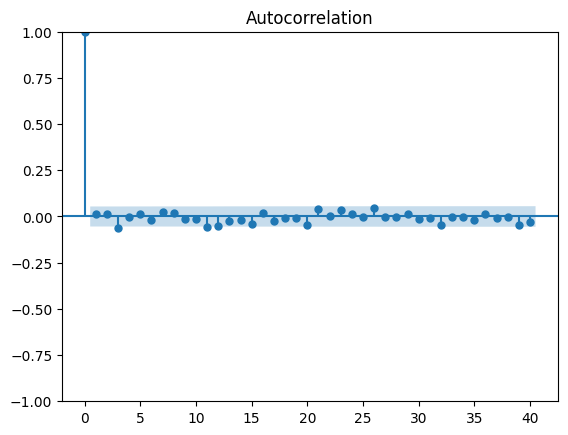

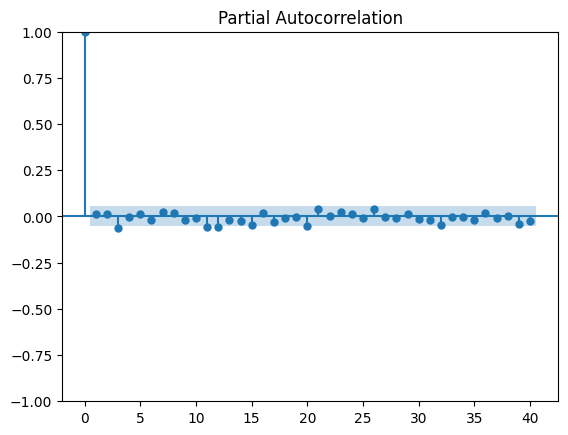

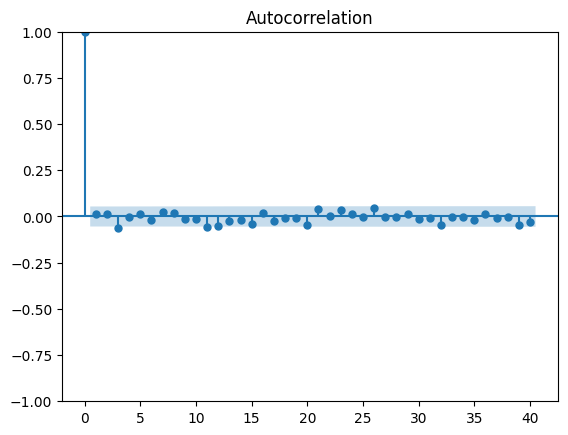

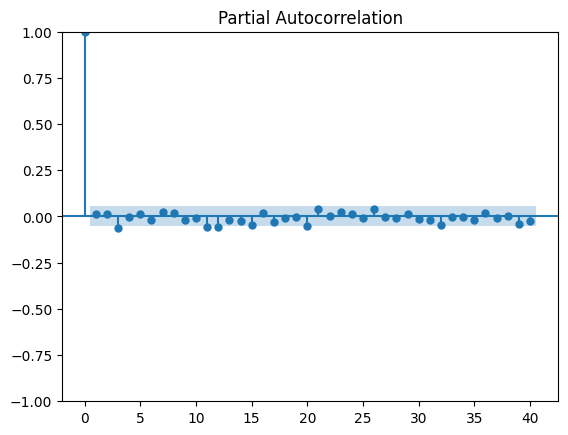

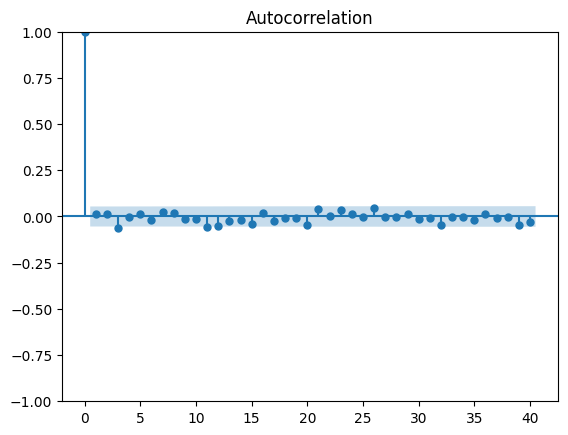

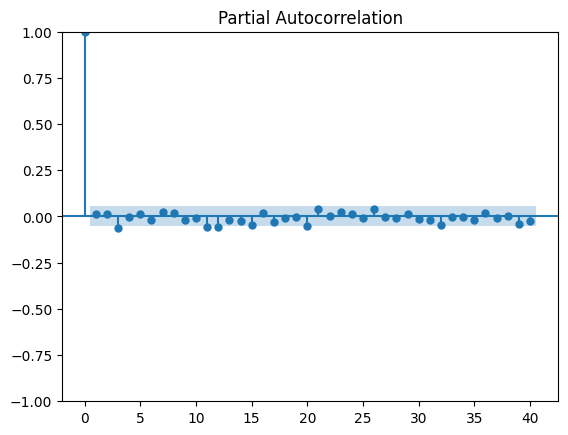

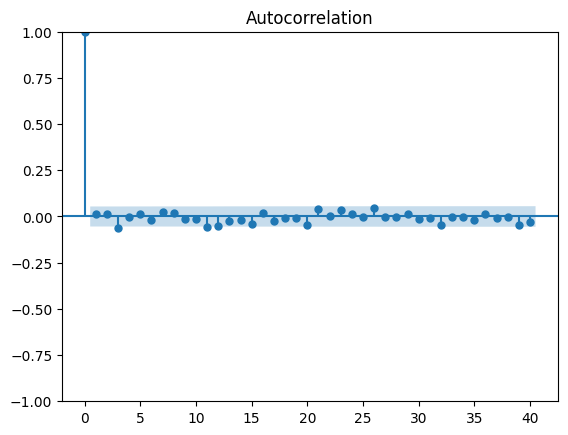

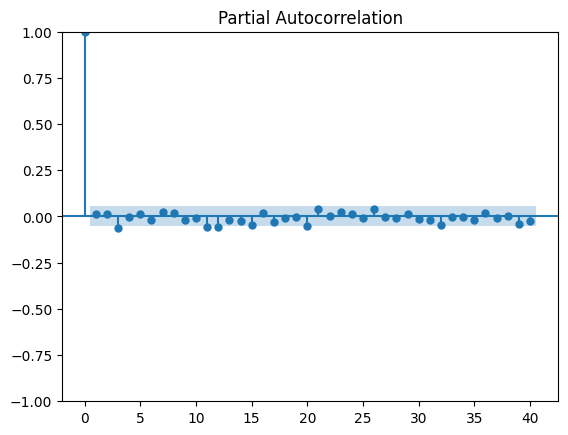

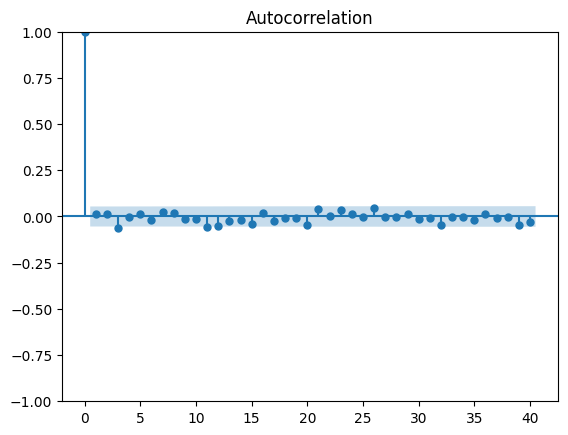

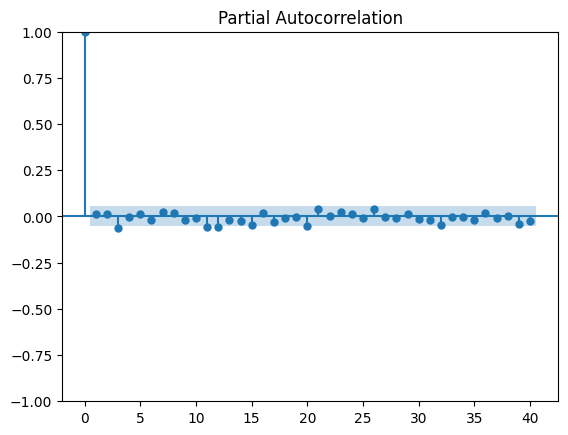

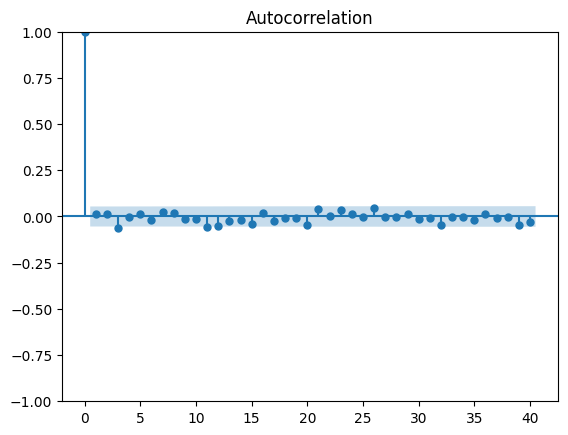

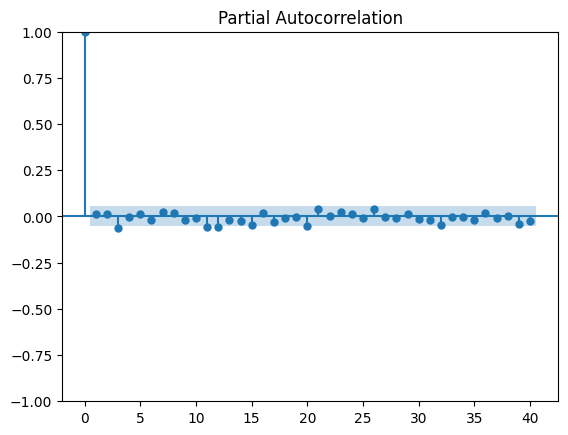

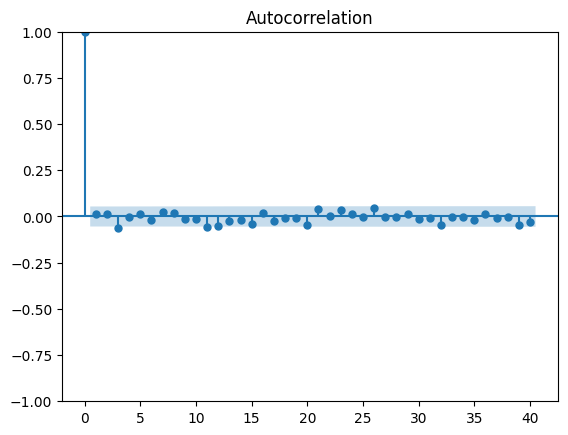

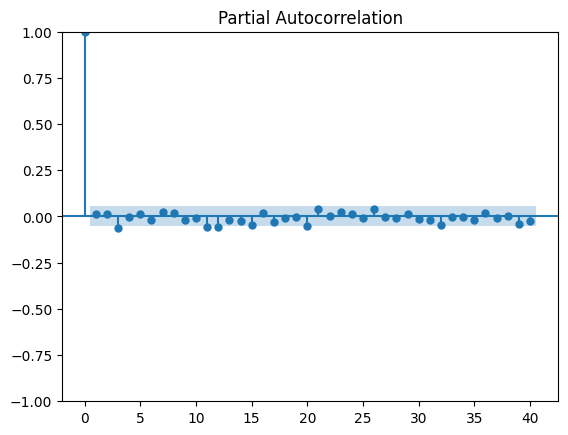

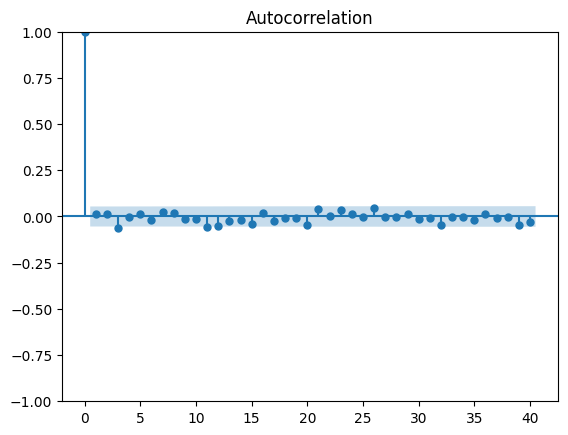

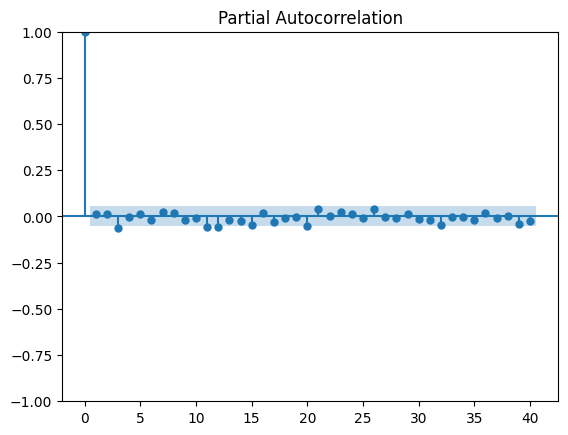

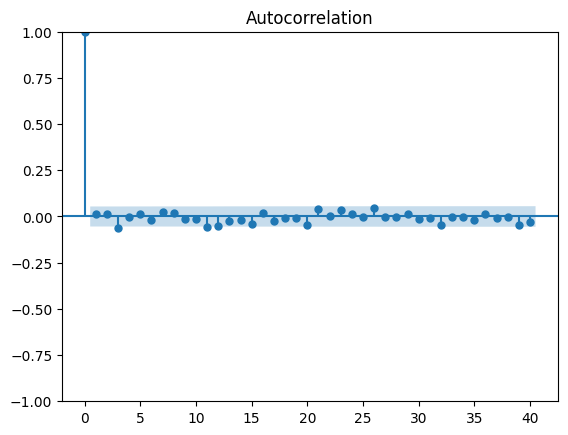

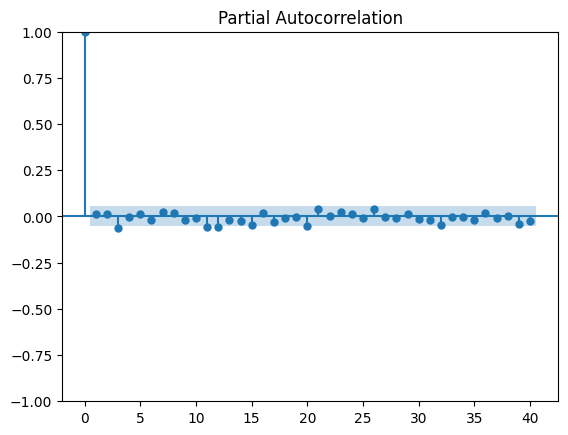

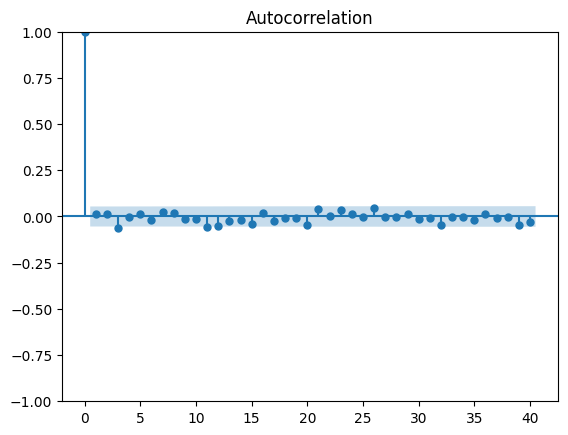

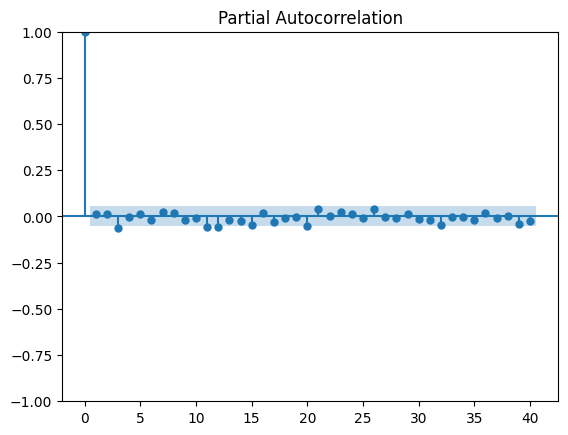

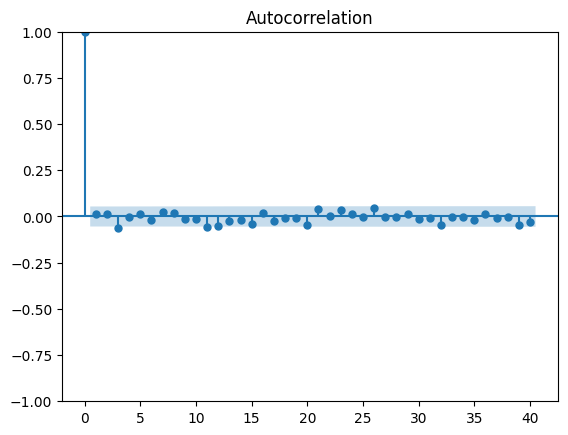

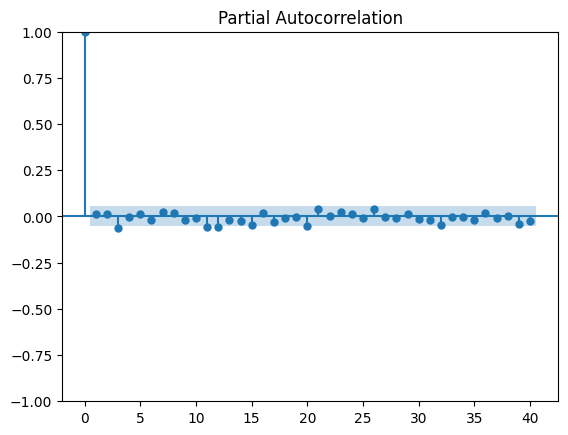

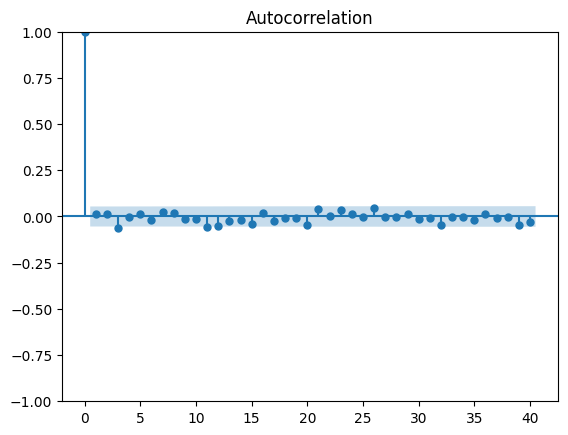

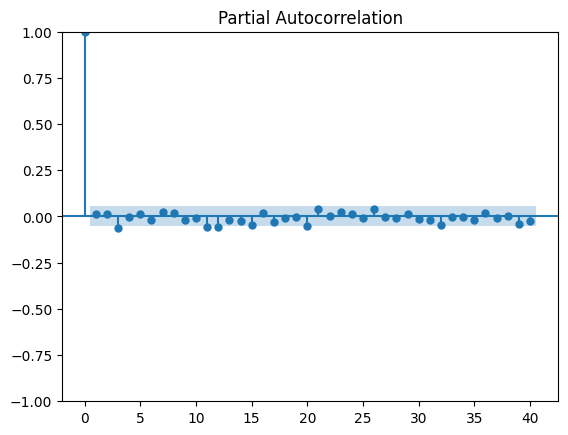

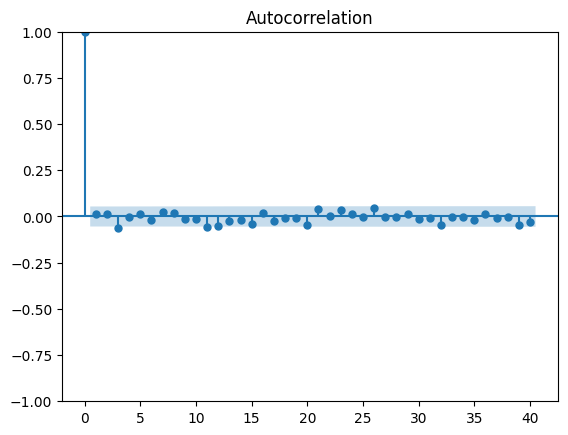

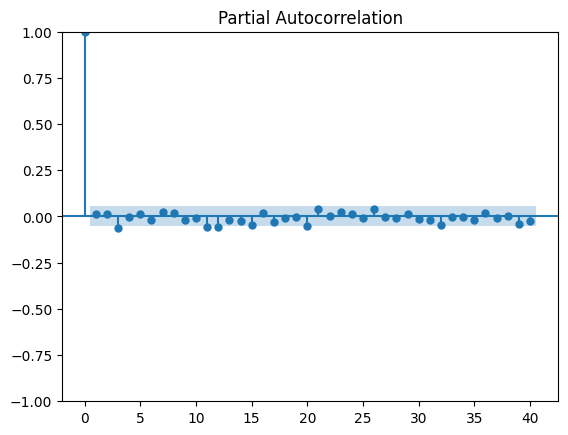

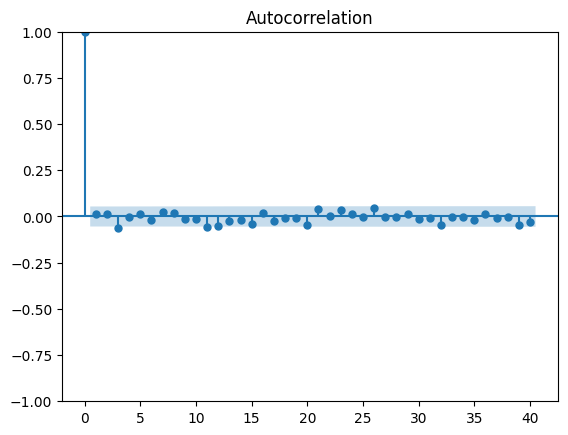

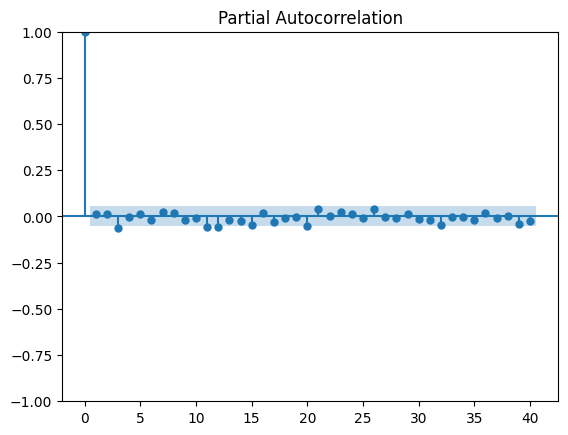

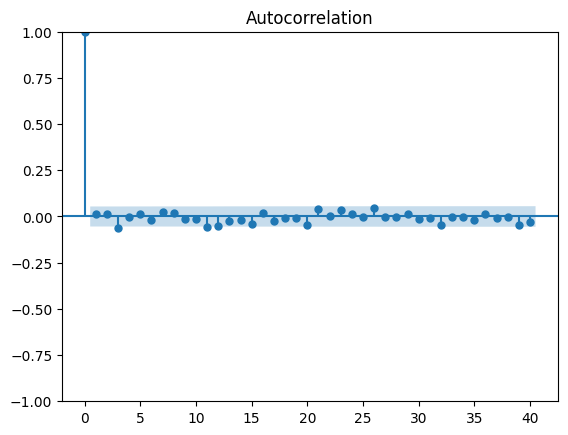

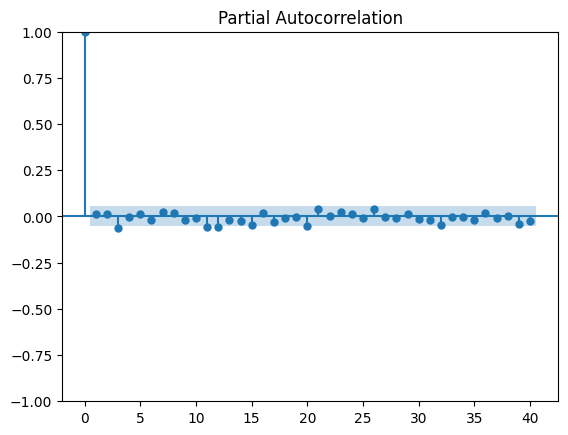

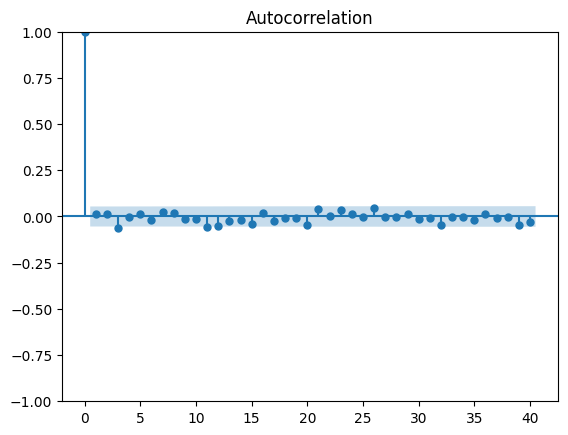

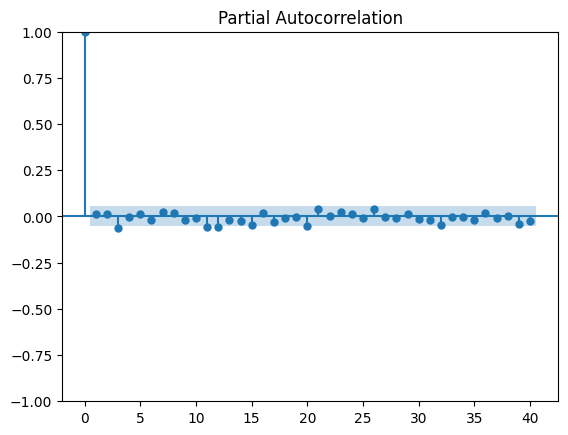

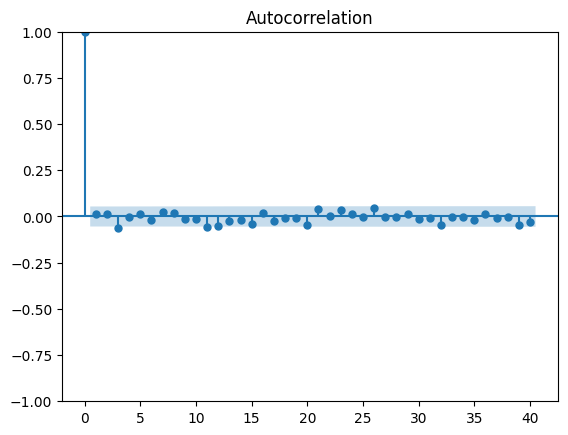

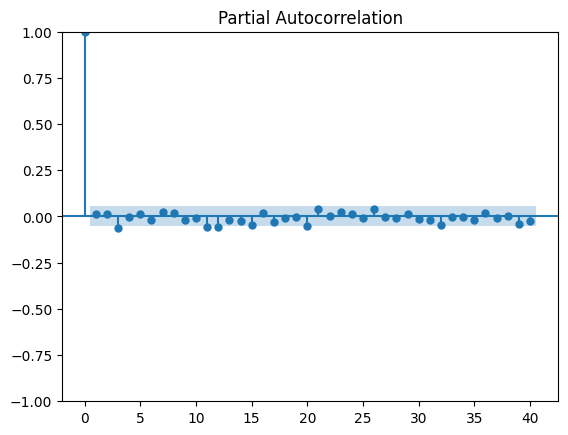

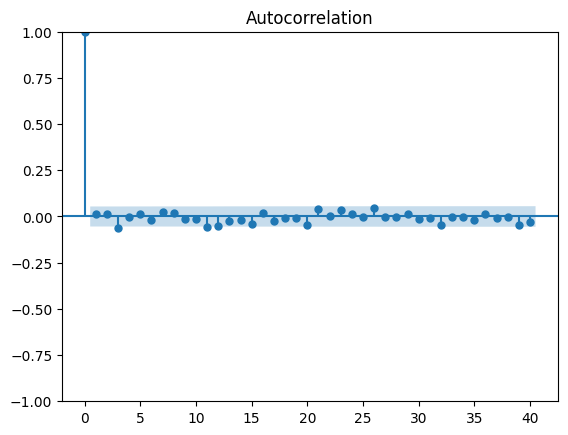

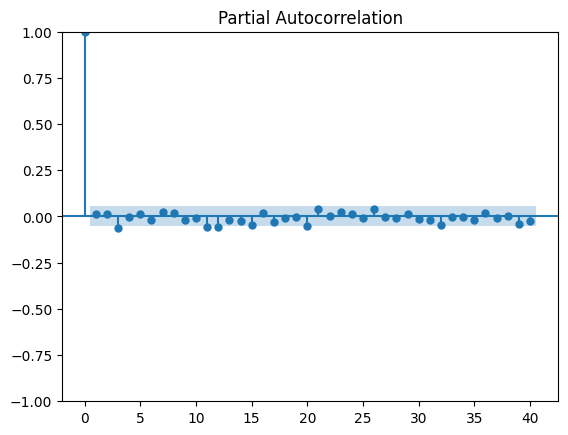

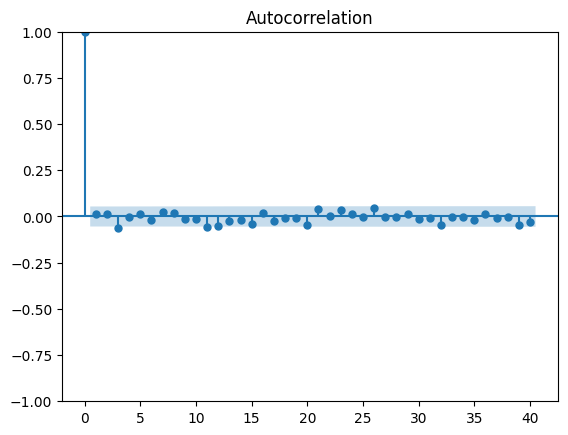

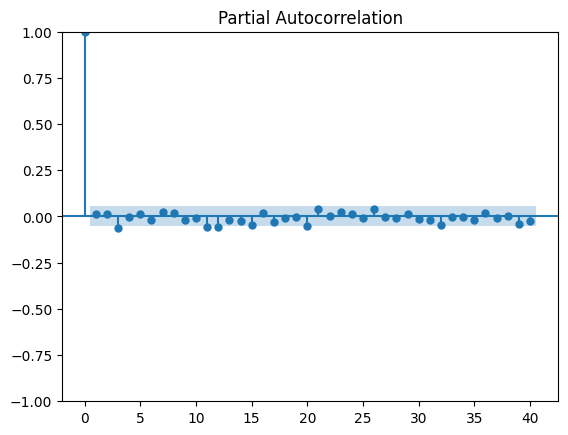

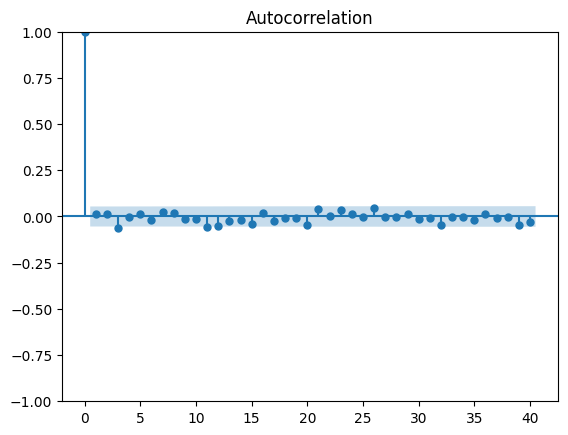

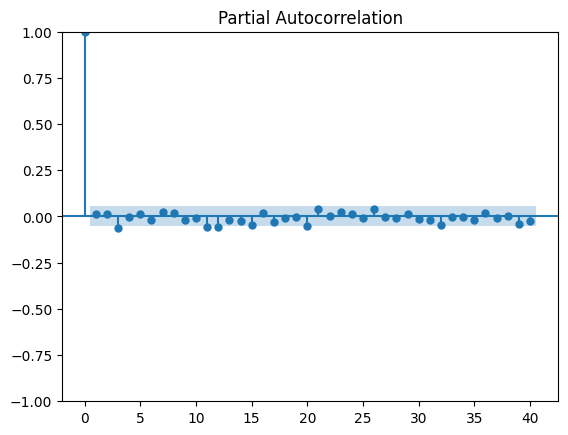

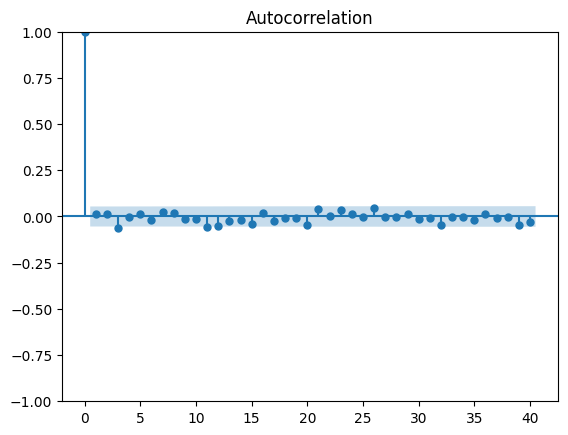

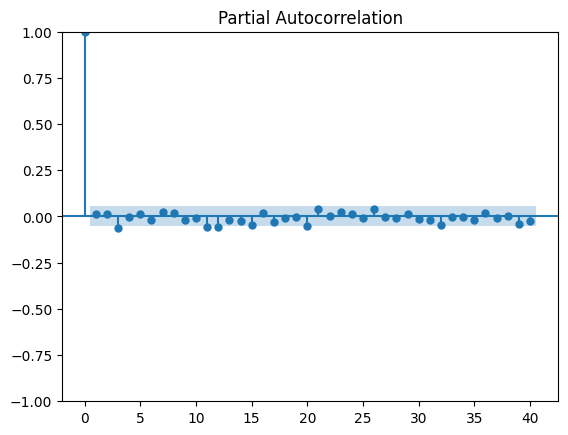

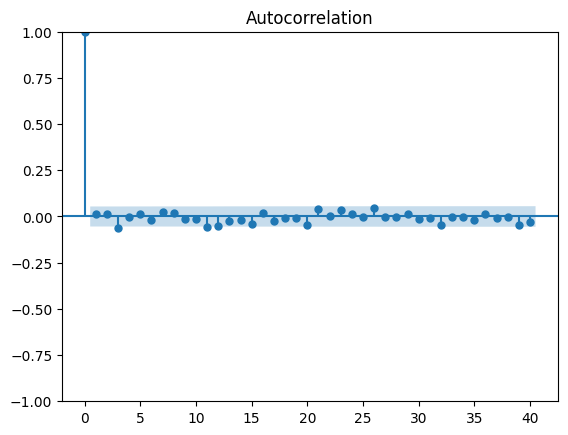

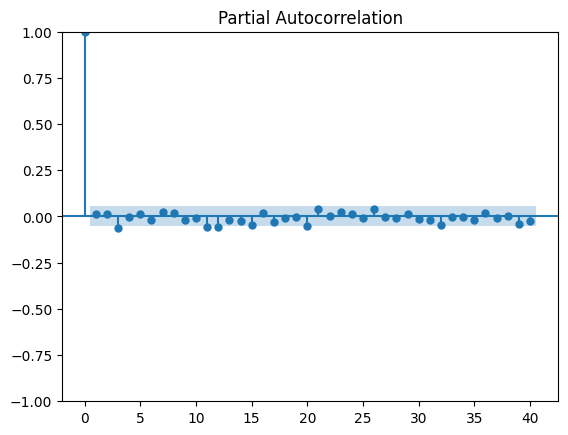

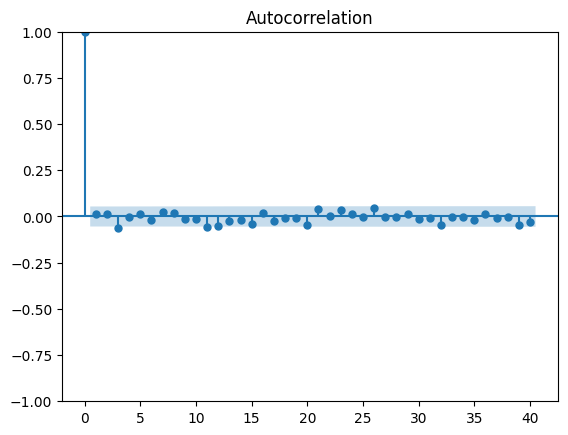

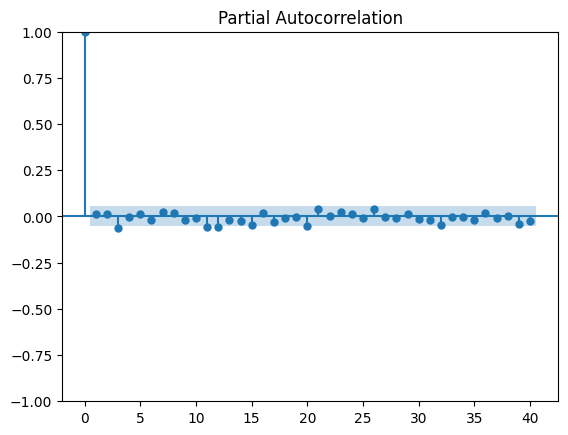

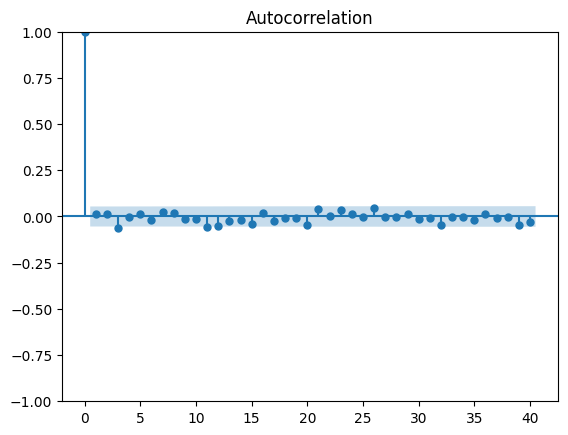

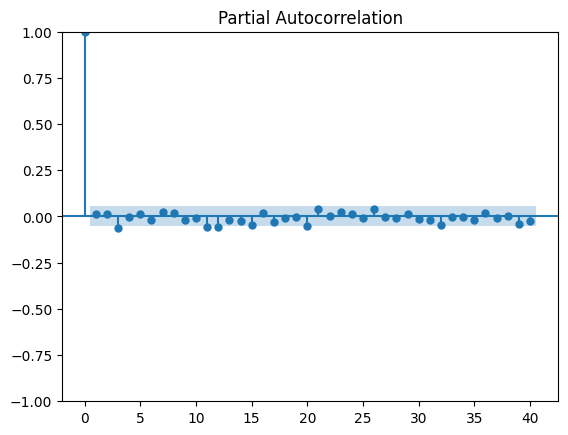

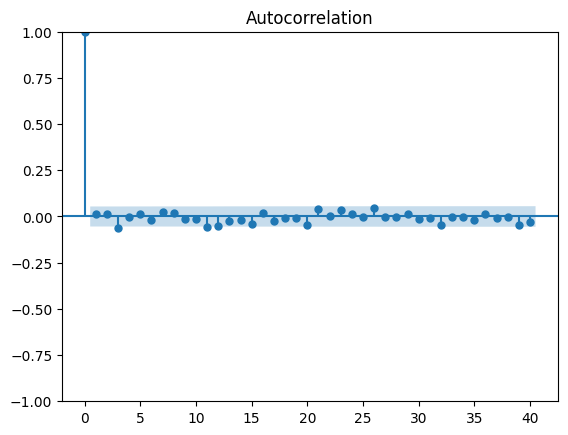

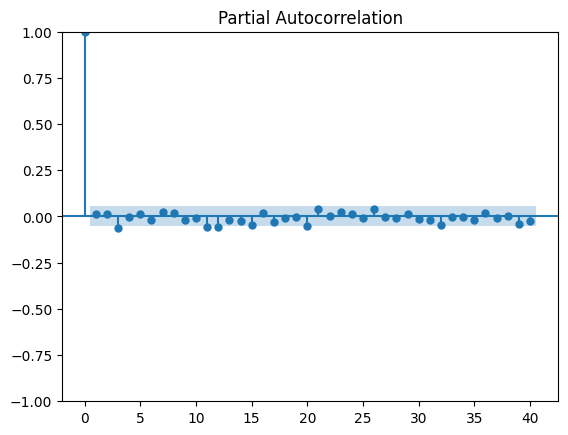

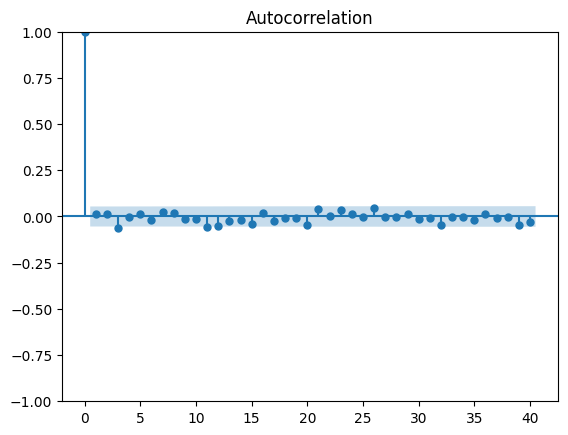

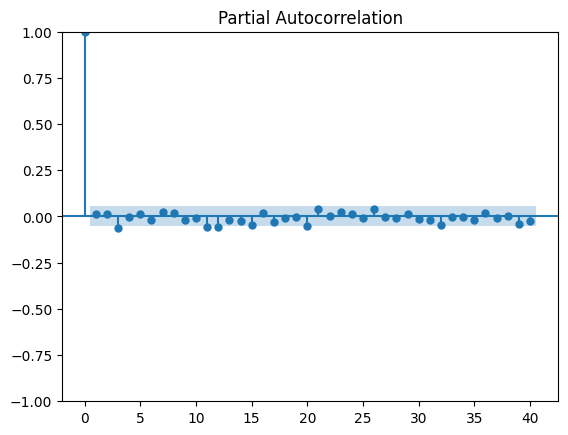

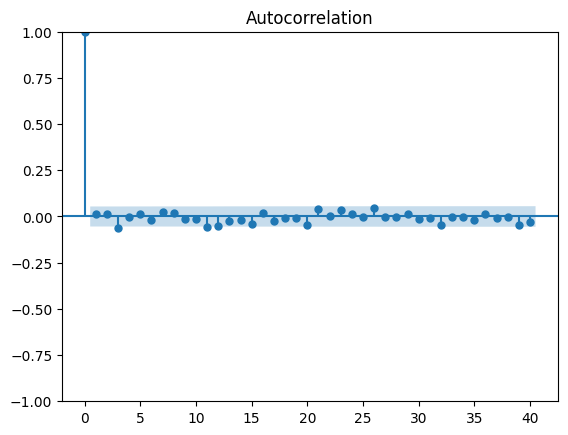

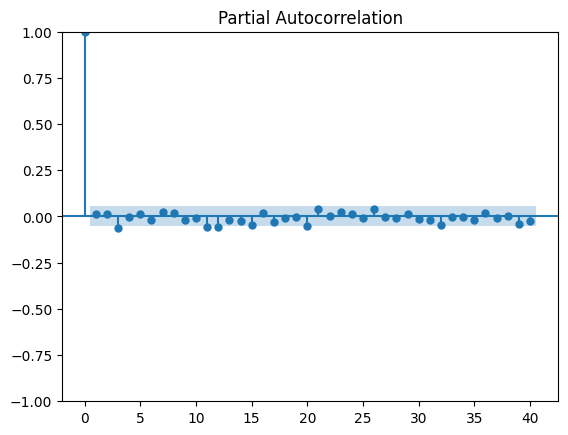

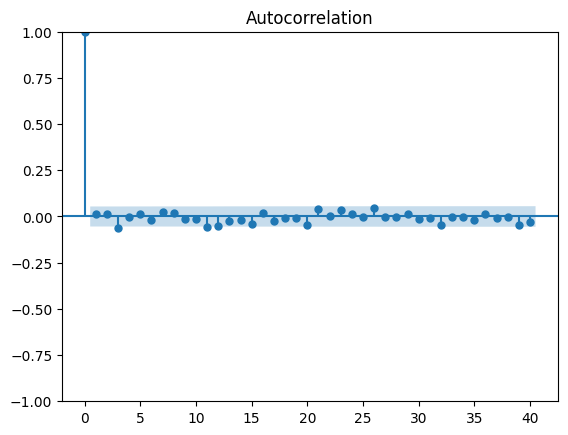

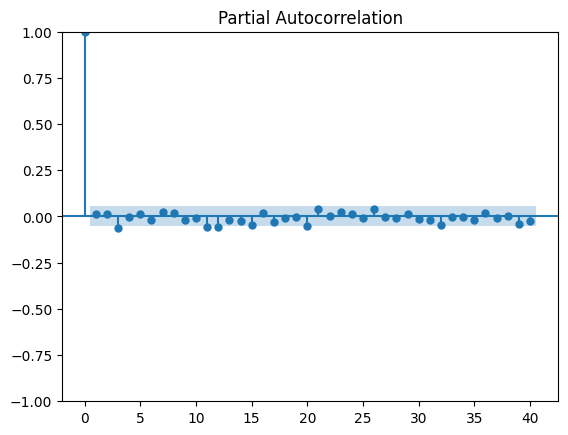

In [3]:
for ticker in get_ibex_tickers():
    print("Ticker", ticker)
    t = df[df["ticker"] == "BBVA.MC"]    
    t = t.reset_index(drop=True)
    t["date"] = pd.to_datetime(t["date"])
    t = t.set_index("date")
    t = t.asfreq("B")
    t["close"] = t["close"].ffill()
    prices = t["close"]
    log_returns = np.log(prices).diff().dropna()

    plot_acf(log_returns,lags=40);
    plot_pacf(log_returns, lags=40);